
Epoch 00001: val_loss improved from inf to 0.25780, saving model to ./model/01-0.2578.hdf5

Epoch 00002: val_loss improved from 0.25780 to 0.22976, saving model to ./model/02-0.2298.hdf5

Epoch 00003: val_loss improved from 0.22976 to 0.20790, saving model to ./model/03-0.2079.hdf5

Epoch 00004: val_loss improved from 0.20790 to 0.19085, saving model to ./model/04-0.1909.hdf5

Epoch 00005: val_loss improved from 0.19085 to 0.17782, saving model to ./model/05-0.1778.hdf5

Epoch 00006: val_loss improved from 0.17782 to 0.16699, saving model to ./model/06-0.1670.hdf5

Epoch 00007: val_loss improved from 0.16699 to 0.15766, saving model to ./model/07-0.1577.hdf5

Epoch 00008: val_loss improved from 0.15766 to 0.15042, saving model to ./model/08-0.1504.hdf5

Epoch 00009: val_loss improved from 0.15042 to 0.14538, saving model to ./model/09-0.1454.hdf5

Epoch 00010: val_loss improved from 0.14538 to 0.14189, saving model to ./model/10-0.1419.hdf5

Epoch 00011: val_loss improved from 0.14189

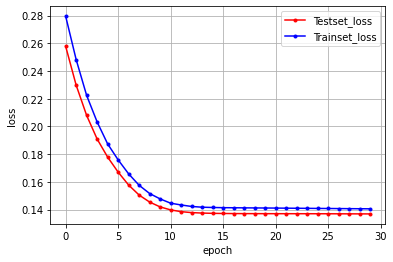

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('../dataset/b_depressed.csv')
df = df.drop('Survey_id', axis =1)
df = df.drop('Ville_id', axis =1)
df = df.dropna()

dataset = df.values
X = dataset[:,0:20]
Y = dataset[:,20]

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=20, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()